<a href="https://colab.research.google.com/github/artfix3r/MNIST_Fashion/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
x_train = np.expand_dims(x_train, axis=-1)  # Now shape should be (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)



In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
K=len(set(y_train))

In [ ]:
K

10

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.7396 - loss: 0.7023 - val_accuracy: 0.8435 - val_loss: 0.4109
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.8603 - loss: 0.3736 - val_accuracy: 0.8610 - val_loss: 0.3737
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8798 - loss: 0.3131 - val_accuracy: 0.8705 - val_loss: 0.3344
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8933 - loss: 0.2819 - val_accuracy: 0.8875 - val_loss: 0.3080
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9083 - loss: 0.2438 - val_accuracy: 0.8910 - val_loss: 0.3002
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9155 - loss: 0.2256 - val_accuracy: 0.8945 - val_loss: 0.2990
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.9194 - loss: 0.2095 - val_accuracy: 0.8981 - val_loss: 0.2973
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9289 -

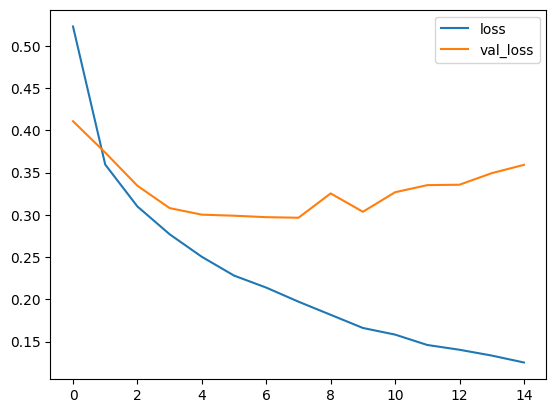

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

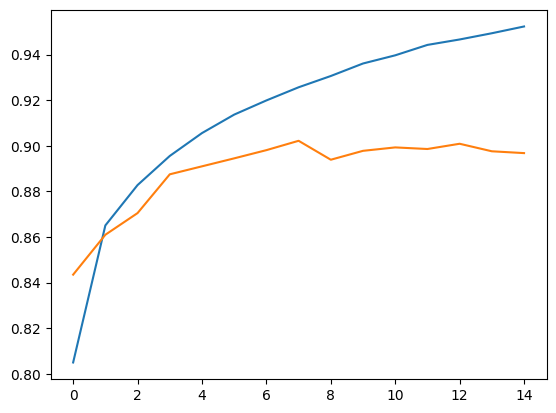

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Confusion matrix, without normalization
[[848   1  24  18   4   2  99   0   4   0]
 [  2 971   0  17   2   0   7   0   1   0]
 [ 14   0 822  11  57   0  93   0   3   0]
 [ 11   4  16 905  32   2  28   0   2   0]
 [  2   1  50  21 840   0  84   0   2   0]
 [  0   0   0   1   0 968   0  24   0   7]
 [117   1  53  23  81   0 716   0   9   0]
 [  0   0   0   0   0  12   0 967   0  21]
 [  2   0   0   5   4   3   6   5 973   2]
 [  0   0   0   0   0   5   1  36   0 958]]


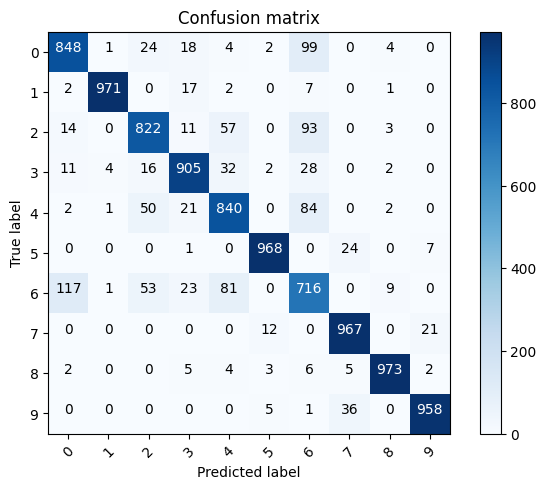

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

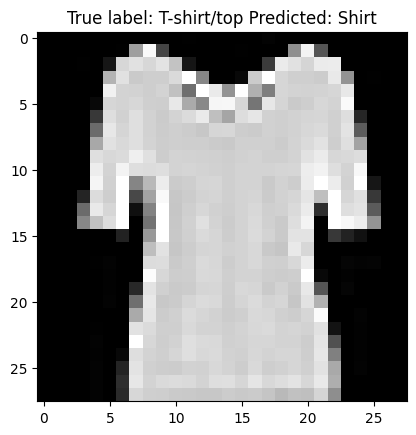

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));